# T.P. 1 : Pivot de Gauss

#### Les matrices A et b qu'on va utiliser pour réaliser nos tests:

In [358]:
A = [3 4 0 3 0;
     5 -4 3 -4 2;
     3 0 1 4 4;
     -1 -1 -3 -5 -3;
     -3 -5 -5 -3 1];
 
b = [23;0;42;-47;-35];

% autre option
% matrice_test_A = rand(5);
% matrice_test_b = rand(5,1);

#### Première fonction gauss qui calcule la solution de A*x = b
#### cette fonction renvoie x

In [359]:
%%file gauss.m

function x = gauss(A,b)
   lignes = size(A,1);
   colones = size(A,2);
   
   if lignes ~= colones
       error('La matrice doit etre carre')
   elseif lignes ~= size(b,1) | size(b,2)~=1
       error('dimensions incompatibles')
   end

    %descente
    B = [A,b];
    
    for  i=1:colones-1
        for j=i+1:lignes
            B(j,:) = B(j,:)-B(j,i)*B(i,:)/ B(i,i);
        end
    end
    %disp(B)
  
    
    %remontee
     x=zeros(lignes,1);
     
     for i=lignes:-1:1
        x(i)= (B(i,lignes+1) - B(i,i+1:lignes)*x(i+1:end))/B(i,i);
     end
    
 
    
end %sol =A\b

Created file '/home/yisakor.weldegebriel/gauss.m'.


In [360]:
x1=gauss(A,b)


x1 =

    1.0000
    2.0000
    3.0000
    4.0000
    5.0000



#### Deuxième fonction gauss qui calcule la solution de A*x = b grâce à un cadrage et un pivotage partiel à chaque étape
#### cette fonction renvoie x

In [361]:
%%file gauss2.m

function x = gauss2(A,b)
   lignes = size(A,1);
   colones = size(A,2);
   if lignes ~= colones
       error('La matrice doit etre carre');
   elseif lignes ~= size(b,1) | size(b,2)~=1
       error('dimensions incompatibles');
   end
   
    %triangularisation
    B = [A,b];
    
    %disp(B);
    for  i=1:colones-1
        %disp('avant'); disp(B);
        M_lignes = max(abs(B(i:lignes,i:colones)),[],2);
        temp = B(i:lignes,i:colones+1);
        %disp('les max');disp(M_lignes);
        for compteur = 1:length(M_lignes)
            temp(compteur,:) = temp(compteur,:)/M_lignes(compteur);
        end
        B(i:lignes,i:colones+1)=temp;
        %disp('après cadrage');disp(B);
        if abs(B(i,i))<1
            %disp(B(i,i));
            maxicol = max(abs(B(i:lignes,i)));
            [indicemax_l indicemax_c] = find(abs(B(i:lignes,i))== maxicol);
            temp2 = B(i+indicemax_l(1)-1,:);%%% err
            B(i+indicemax_l(1)-1,:)= B(i,:);
            B(i,:)= temp2;
        end
        %disp('après échange de lignes');disp(B);
        for j=i+1:lignes
            B(j,:) = B(j,:)-B(j,i)*B(i,:)/ B(i,i);
        end
    end
    %disp(B)
  
    
    %remonte
     x=zeros(lignes,1);
     
     for i=lignes:-1:1
        x(i)= (B(i,lignes+1) - B(i,i+1:lignes)*x(i+1:end))/B(i,i);
     end
end %sol =A\b



Created file '/home/yisakor.weldegebriel/gauss2.m'.


In [362]:
x2 = gauss2(A,b)


x2 =

    1.0000
    2.0000
    3.0000
    4.0000
    5.0000



#### Troisième fonction gauss qui calcule la solution de A*x = b grâce à une méthode de pivot total
#### cette fonction renvoie x

In [363]:
%%file gauss3.m


function x = gauss3(A,b)
   lignes = size(A,1);
   colones = size(A,2);
   if lignes ~= colones
       error('La matrice doit etre carre')
   elseif lignes ~= size(b,1) | size(b,2)~=1
       error('dimensions incompatibles')
   end
   
    %triangularisation
    B = [A,b];
    matrice_permutations=1:lignes;
    %disp(B)
    for  i=1:colones-1
        %disp('avant'); disp(B);
        temp = B(i:lignes,i:colones+1);%sous matrice 
        M = max(max(abs(temp(:,1:length(temp)-1)),[],2));%maxi de la sous matrice
        [indice_max_l, indice_max_c] = find(abs(temp)==M); %coord du max de la sous matrice 
        
        
        temp_lignes = temp(indice_max_l(1),:);%ligne du max
        %echange de lignes
        temp(indice_max_l(1),:)= temp(1,:);
        temp(1,:) = temp_lignes;
        B(i:lignes,i:colones+1) = temp;
        
        temp_colones = B(:,i+indice_max_c(1)-1);
        temp_permutation = matrice_permutations(i+indice_max_c(1)-1);
        %disp('après echange lignes');disp(B);
        
        %echanges de colonnes 
        B(:,i+indice_max_c(1)-1) = B(:,i);
        B(:,i) = temp_colones;
        
        matrice_permutations(i+indice_max_c(1)-1)= matrice_permutations(i);
        matrice_permutations(i)= temp_permutation;
        
        
        %disp('après permutation de colonnes');disp(B);disp(matrice_permutations);
        for j=i+1:lignes
            B(j,:) = B(j,:)-B(j,i)*B(i,:)/ B(i,i);
        end
    end
    %disp(B)
  
    
    %remonte
     x=zeros(lignes,1);
     
     for i=lignes:-1:1
        x(i)= (B(i,lignes+1) - B(i,i+1:lignes)*x(i+1:end))/B(i,i);
     end
     
     %ajustement
    
     %disp('matrice de perm avant ajustement');disp(matrice_permutations);
     for i=1:length(x)
         temp_x = x(i);
         temp = matrice_permutations(i);
         
         indice_modifie = find(matrice_permutations==i);
        
         x(i)=x(indice_modifie);
         matrice_permutations(i)=matrice_permutations(indice_modifie);
        
         x(indice_modifie)=temp_x;
         matrice_permutations(indice_modifie)=temp;
     end
     %disp('matrice de perm après ajustement');disp(matrice_permutations)
     
end %sol =A\b

Created file '/home/yisakor.weldegebriel/gauss3.m'.


In [364]:
x3 = gauss3(A,b)


x3 =

    1.0000
    2.0000
    3.0000
    4.0000
    5.0000



## Calculer un polynôme d'interpolation, tracer ce polynôme et sin(5.pi.x) sur [0,1]: 

### à l'aide de gauss1:

In [373]:
%%file poly1.m

function poly1(n)
    vecteur_pts = linspace(0,1,n);
    vecteur_img = sin(5*pi*vecteur_pts);
    
    A = zeros(length(vecteur_pts),length(vecteur_pts));
    v=vecteur_img.';
    for i =1:length(vecteur_pts)
        for j=1:length(vecteur_pts)
            temp = vecteur_pts(i);
            A(i,j)= temp^(j-1);
        end
    end
    coeff = flip(gauss(A,v));
    
   
    x=0:0.01:1;
    vecteur_img_poly = polyval(coeff,x);
    y=sin(5*pi*x).';
    
    %plot inline
    plot(x,y,x,vecteur_img_poly,'g',vecteur_pts, vecteur_img,'or');
    legend({'sin(5.pi.x)','polynome','points d''interpolation'}, 'Location','best');
    ylim([-2 2]);
    
    
    
    
    
end

Created file '/home/yisakor.weldegebriel/poly1.m'.


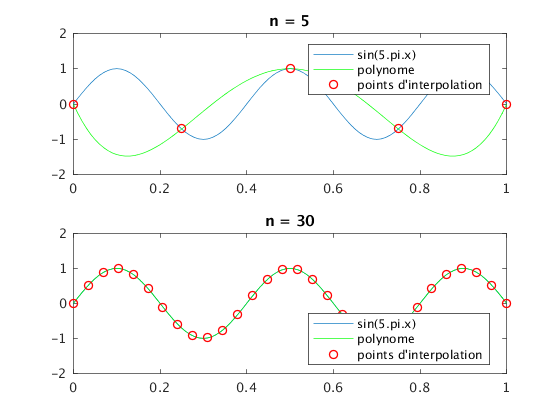

In [375]:
subplot(2,1,1)
poly1(5);
title('n = 5')

subplot(2,1,2)
poly1(30);
title('n = 30')

#### on observe ci-dessous qu'à partir d'un certain rang le calcul est erroné et le polynôme ne suit plus la fonction sin

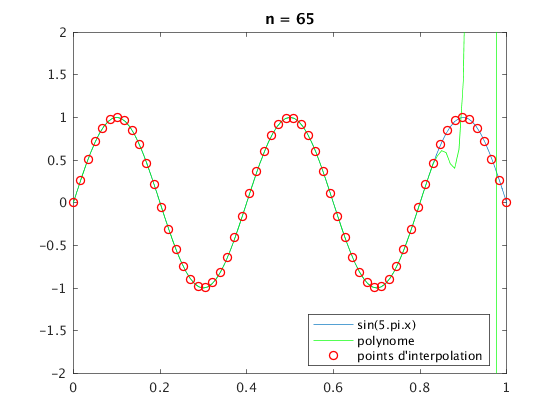

In [376]:

poly1(65);
title('n = 65')

### à l'aide de gauss2:

In [377]:
%%file poly2.m

function poly2(n)
    vecteur_pts = linspace(0,1,n);
    vecteur_img = sin(5*pi*vecteur_pts);
    
    A = zeros(length(vecteur_pts),length(vecteur_pts));
    v=vecteur_img.';
    for i =1:length(vecteur_pts)
        for j=1:length(vecteur_pts)
            temp = vecteur_pts(i);
            A(i,j)= temp^(j-1);
        end
    end
    coeff = flip(gauss2(A,v));
    
   
    x=0:0.01:1;
    vecteur_img_poly = polyval(coeff,x);
    y=sin(5*pi*x).';
    
    %plot inline
    plot(x,y,x,vecteur_img_poly,'g',vecteur_pts, vecteur_img,'or');
    legend({'sin(5.pi.x)','polynome','points d''interpolation'}, 'Location','best');
    ylim([-2 2]);
    
end

Created file '/home/yisakor.weldegebriel/poly2.m'.


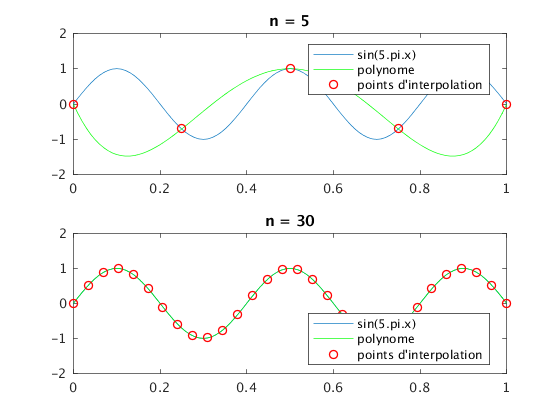

In [379]:
subplot(2,1,1)
poly2(5);
title('n = 5')

subplot(2,1,2)
poly2(30);
title('n = 30')



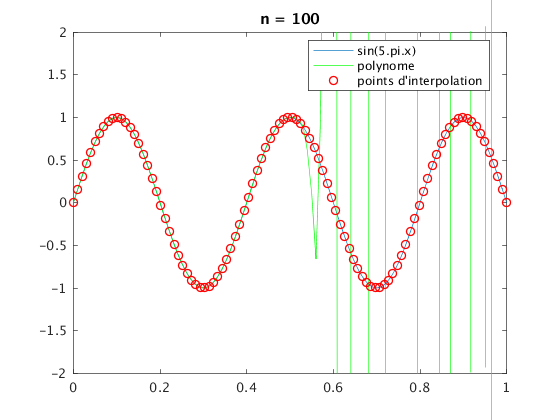

In [384]:
poly2(100);
title('n = 100')

### à l'aide de gauss3:

In [382]:
%%file poly3.m

function poly3(n)
    vecteur_pts = linspace(0,1,n);
    vecteur_img = sin(5*pi*vecteur_pts);
    
    A = zeros(length(vecteur_pts),length(vecteur_pts));
    v=vecteur_img.';
    for i =1:length(vecteur_pts)
        for j=1:length(vecteur_pts)
            temp = vecteur_pts(i);
            A(i,j)= temp^(j-1);
        end
    end
    coeff = flip(gauss3(A,v));
    
   
    x=0:0.01:1;
    vecteur_img_poly = polyval(coeff,x);
    y=sin(5*pi*x).';
    
    %plot inline
    plot(x,y,x,vecteur_img_poly,'g',vecteur_pts, vecteur_img,'or');
    legend({'sin(5.pi.x)','polynome','points d''interpolation'}, 'Location','best');
    ylim([-2 2]);
    
end

Created file '/home/yisakor.weldegebriel/poly3.m'.


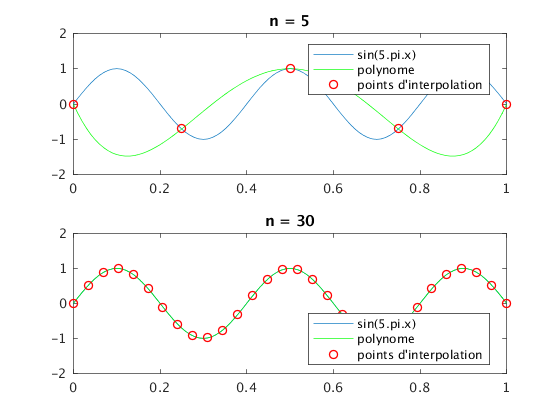

In [342]:
subplot(2,1,1)
poly3(5);
title('n = 5')

subplot(2,1,2)
poly3(30);
title('n = 30')




### On observe que le polynôme calculé à l'aide de gauss3 est très performant

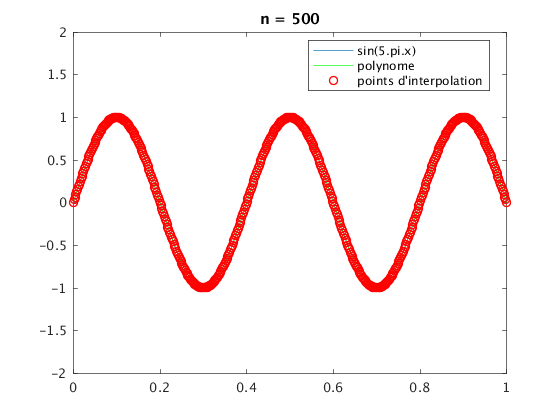

In [385]:
poly3(500);
title('n = 500')